Coding Challenge
===
**Shane Bracher** \<sbracher@gmail.com\>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.

# Settings

In [2]:
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 30)
pd.set_option('precision', 3)  # number of decimal places

filename = 'Book1.csv'  # assumes that csv file is in same directory as this Jupyter notebook file

# modelling settings
validation_size = 0.2     # 20% of the dataset
seed = 8         
num_folds = 10
scoring = 'neg_mean_squared_error'

# Load Data

Load csv data into a data frame. Before loading, clean up file to remove quotation marks so that csv data is correctly loaded into data frame.

In [3]:
# read in csv file to clean up
with open(filename, 'r') as file :
  filedata = file.read()

# remove all quotation marks from the csv file
filedata = filedata.replace('"', '')

# write out the cleaned up file with new filename
filename_noquotes = 'noquotes_' + filename
with open(filename_noquotes, 'w') as file:
  file.write(filedata)

# load data from new csv with quotation marks removed
data = pd.read_csv(filename_noquotes)

# columns names
names = data.columns

In [4]:
# quick peek at dataset to check it loaded correctly
data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60.0,30.0,19.89,47.597,19.2,44.790,19.79,44.730,19.000,45.567,17.167,55.20,7.027,84.257,17.200,41.627,18.2,48.900,17.033,45.53,6.600,733.5,92.0,7.000,63.000,5.3,13.275,13.275
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.693,19.2,44.722,19.79,44.790,19.000,45.992,17.167,55.20,6.833,84.063,17.200,41.560,NaN,48.863,NaN,45.56,6.483,733.6,92.0,6.667,NaN,5.2,18.606,18.606
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.300,19.2,44.627,19.79,44.933,18.927,45.890,17.167,55.09,6.560,83.157,17.200,41.433,18.2,48.730,17.000,45.50,6.367,NaN,92.0,6.333,55.333,5.1,28.643,28.643
3,2016-01-11 17:30:00,50.0,40.0,19.89,46.067,19.2,44.590,19.79,45.000,18.890,45.723,17.167,55.09,6.433,83.423,17.133,41.290,18.1,48.590,17.000,45.40,6.250,733.8,NaN,6.000,51.500,5.0,45.410,45.410
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.333,19.2,44.530,19.79,45.000,18.890,45.530,17.200,55.09,6.367,84.893,17.200,NaN,18.1,48.590,17.000,45.40,6.133,733.9,NaN,5.667,47.667,4.9,10.084,10.084


# Exploration

In [5]:
# check size (number of rows and columns)
data.shape

(19735, 29)

In [6]:
# check data type for each column
types = data.dtypes
print(types)

date            object
Appliances     float64
lights         float64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object


In [7]:
# summary statistics
description = data.describe()
print(description)

       Appliances     lights         T1       RH_1         T2       RH_2         T3       RH_3  \
count   18584.000  18473.000  16112.000  16131.000  15987.000  16373.000  16103.000  16322.000   
mean       97.166      3.775     21.700     40.509     20.422     40.541     22.326     39.454   
std       101.804      7.906      1.639      3.944      2.208      4.062      2.036      3.247   
min        10.000      0.000     16.790     27.023     16.100     20.597     17.200     28.767   
25%        50.000      0.000     20.730     37.700     18.890     37.978     20.790     37.163   
50%        60.000      0.000     21.600     39.900     20.071     40.663     22.200     38.790   
75%       100.000      0.000     22.700     43.267     21.600     43.400     23.390     42.000   
max      1080.000     70.000     26.260     63.360     29.857     56.027     29.200     50.163   

              T4       RH_4         T5       RH_5         T6       RH_6         T7       RH_7  \
count  16941.000  16

In [8]:
# count missing values
missing_count = data.isna().sum()
print(missing_count)

date              0
Appliances     1151
lights         1262
T1             3623
RH_1           3604
T2             3748
RH_2           3362
T3             3632
RH_3           3413
T4             2794
RH_4           3506
T5             3151
RH_5           3112
T6             3849
RH_6           3064
T7             3742
RH_7           4318
T8             4117
RH_8           2989
T9             3245
RH_9           3468
T_out          1418
Press_mm_hg    2770
RH_out         1837
Windspeed      2516
Visibility     2760
Tdewpoint      2216
rv1               0
rv2               0
dtype: int64


In [9]:
# calculate percentage of missing values
missing_percent = missing_count / data.shape[0] * 100
print(missing_percent)

date            0.000
Appliances      5.832
lights          6.395
T1             18.358
RH_1           18.262
T2             18.992
RH_2           17.036
T3             18.404
RH_3           17.294
T4             14.158
RH_4           17.765
T5             15.967
RH_5           15.769
T6             19.503
RH_6           15.526
T7             18.961
RH_7           21.880
T8             20.861
RH_8           15.146
T9             16.443
RH_9           17.573
T_out           7.185
Press_mm_hg    14.036
RH_out          9.308
Windspeed      12.749
Visibility     13.985
Tdewpoint      11.229
rv1             0.000
rv2             0.000
dtype: float64


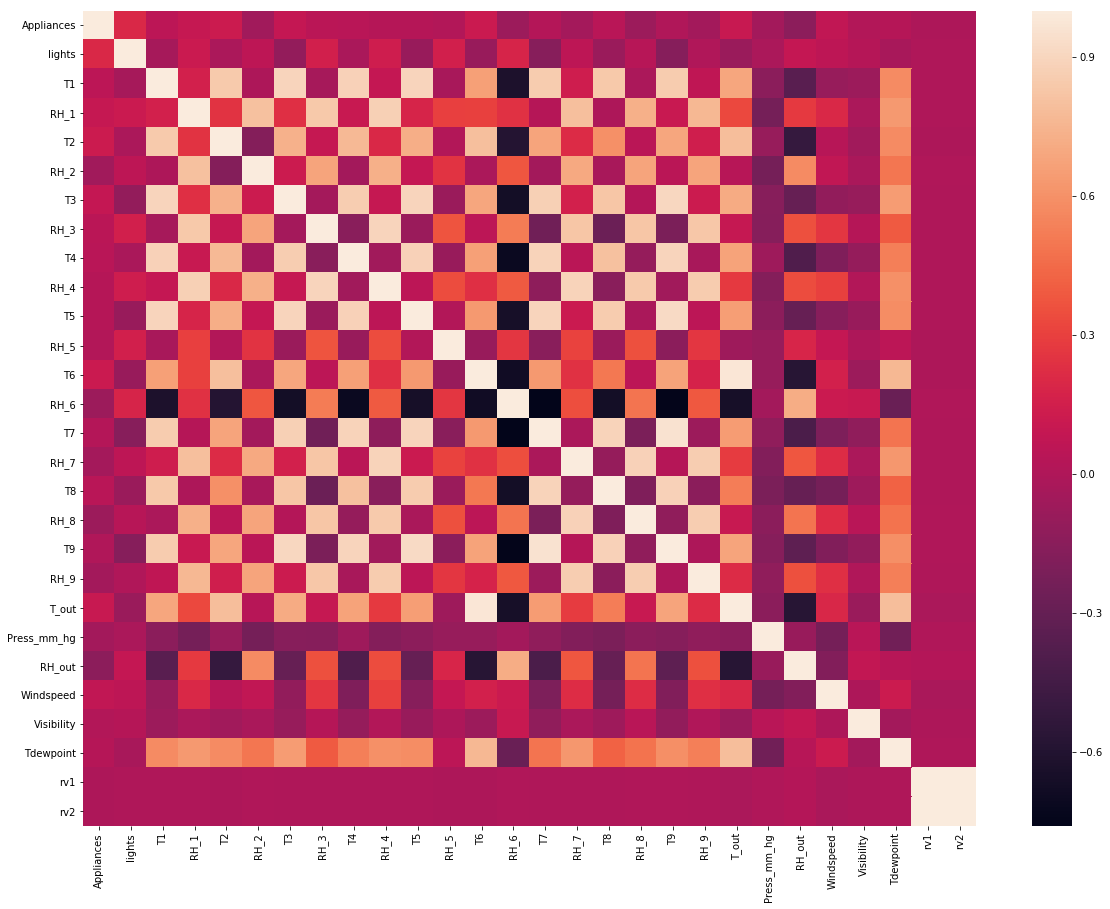

In [10]:
# calculate the correlation matrix
correlations = data.corr(method='pearson')

# plot the heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(
        correlations,
        xticklabels=names[1:],
        yticklabels=names[1:]
)

In [11]:
# print correlations
print(correlations)

             Appliances     lights     T1   RH_1     T2   RH_2     T3   RH_3     T4       RH_4  \
Appliances        1.000  1.996e-01  0.057  0.096  0.123 -0.054  0.088  0.045  0.041  2.535e-02   
lights            0.200  1.000e+00 -0.033  0.117 -0.016  0.064 -0.109  0.152 -0.022  1.345e-01   
T1                0.057 -3.320e-02  1.000  0.160  0.845 -0.009  0.897 -0.038  0.879  8.744e-02   
RH_1              0.096  1.166e-01  0.160  1.000  0.249  0.802  0.234  0.837  0.104  8.759e-01   
T2                0.123 -1.630e-02  0.845  0.249  1.000 -0.176  0.738  0.094  0.771  2.017e-01   
RH_2             -0.054  6.409e-02 -0.009  0.802 -0.176  1.000  0.124  0.681 -0.048  7.294e-01   
T3                0.088 -1.093e-01  0.897  0.234  0.738  0.124  1.000 -0.042  0.861  9.326e-02   
RH_3              0.045  1.521e-01 -0.038  0.837  0.094  0.681 -0.042  1.000 -0.150  8.948e-01   
T4                0.041 -2.197e-02  0.879  0.104  0.771 -0.048  0.861 -0.150  1.000 -5.895e-02   
RH_4              0.

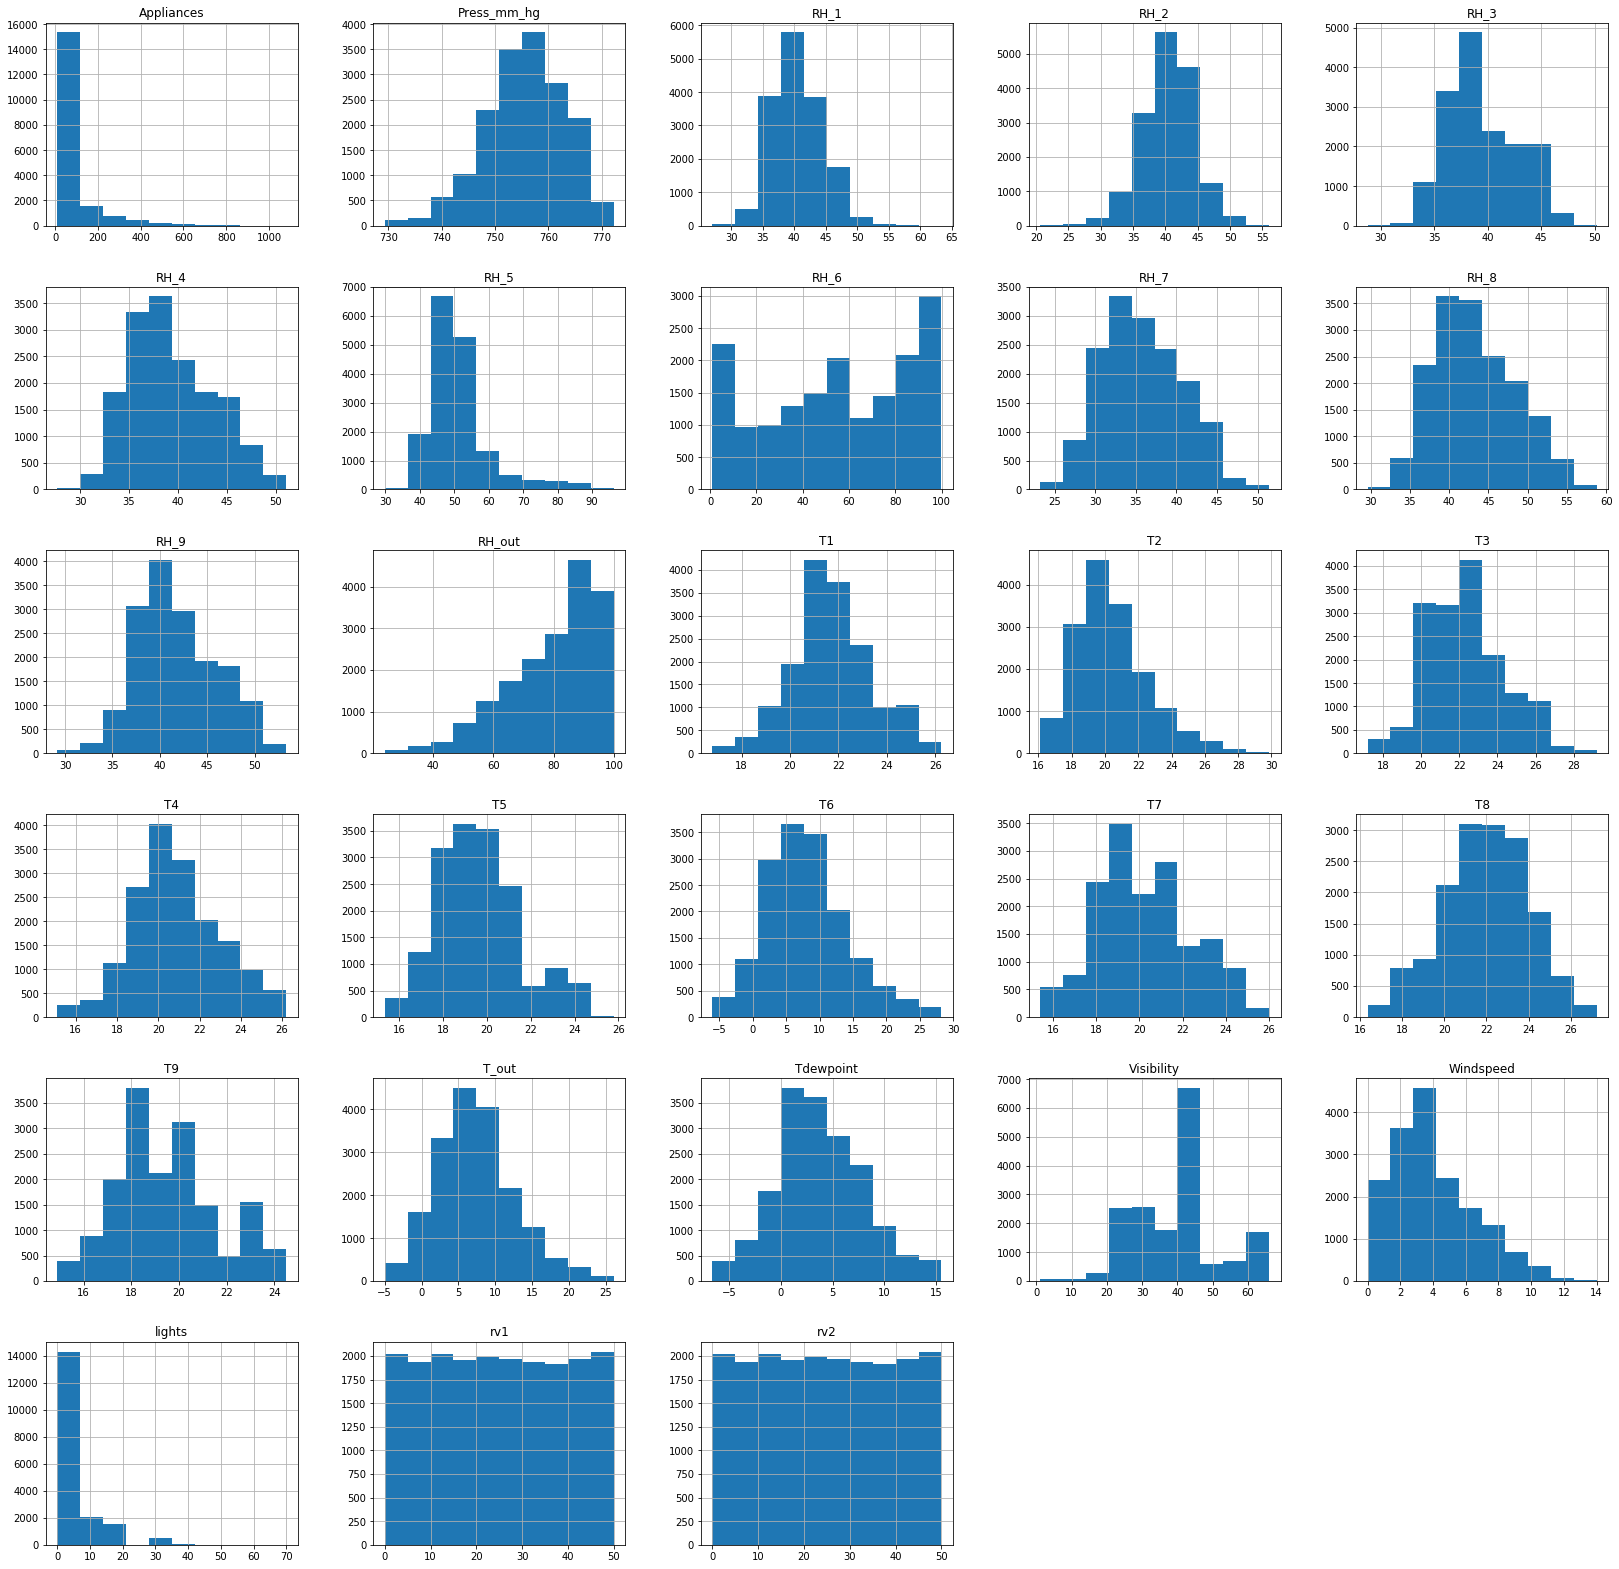

In [12]:
# histograms
data.hist(figsize=(28,28))
plt.show()

# Modelling

## Clean

In [13]:
# calculate the mean to use to fill in missing values
col_mean = data.mean()

In [14]:
# remove observations where dependent variable is missing
dataset = data.dropna(subset=['Appliances'])
dataset.shape

(18584, 29)

In [15]:
# comment out variables not to include in model data set
model_variables = [
    #'date',
    'Appliances',
    #'lights',
    'T1',
    'RH_1',
    'T2',
    'RH_2',
    'T3',
    'RH_3',
    'T4',
    'RH_4',
    'T5',
    'RH_5',
    'T6',
    #'RH_6',
    'T7',
    'RH_7',
    'T8',
    'RH_8',
    #'T9',
    'RH_9',
    'T_out',
    'Press_mm_hg',
    'RH_out',
    #'Windspeed',
    #'Visibility',
    'Tdewpoint'
    #'rv1',
    #'rv2'
]

In [16]:
# filter the data set based on the variables above
dataset = dataset.loc[:,model_variables]

In [17]:
# for independent variables, encode missing values as -9999
# this approach for handling missing values delivered poorer results from the ML models

#dataset = dataset.fillna(value=-9999)
#dataset.head(5)

In [18]:
# for independent variables, fill in missing values with the mean
# the dependent variable does not contain any missing values as these were removed earlier
dataset = dataset.fillna(value=col_mean.to_dict())

In [19]:
dataset.head(5)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Tdewpoint
0,60.0,19.89,47.597,19.2,44.790,19.79,44.730,19.000,45.567,17.167,55.20,7.027,17.200,41.627,18.20,48.900,45.53,6.600,733.500,92.00,5.3
1,60.0,19.89,46.693,19.2,44.722,19.79,44.790,19.000,45.992,17.167,55.20,6.833,17.200,41.560,21.99,48.863,45.56,6.483,733.600,92.00,5.2
2,50.0,19.89,46.300,19.2,44.627,19.79,44.933,18.927,45.890,17.167,55.09,6.560,17.200,41.433,18.20,48.730,45.50,6.367,755.516,92.00,5.1
3,50.0,19.89,46.067,19.2,44.590,19.79,45.000,18.890,45.723,17.167,55.09,6.433,17.133,41.290,18.10,48.590,45.40,6.250,733.800,79.76,5.0
4,60.0,19.89,46.333,19.2,44.530,19.79,45.000,18.890,45.530,17.200,55.09,6.367,17.200,35.808,18.10,48.590,45.40,6.133,733.900,79.76,4.9


## Set up validation hold-out set

In [20]:
model_dataset = dataset.values

# assumes dependent variable is at index 0
X = model_dataset[:,1:]
y = model_dataset[:,0]

X_train, X_validation, y_train, y_validation = cross_validation.train_test_split(X, y, test_size=validation_size, random_state=seed)

## Evaluate candidate algorithms

In [21]:
num_instances = len(X_train)

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [22]:
# evaluate each candidate algorithm listed above
results = []
names = []

for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
    # display the model name, mean squared error, root mean squared error (RMSE)
    message = "%s: %f (%f)" % (name, cv_results.mean()*-1, math.sqrt(cv_results.mean()*-1))
    print(message)

LR: 9334.584488 (96.615653)
LASSO: 9347.500303 (96.682472)
EN: 9395.795657 (96.931912)
KNN: 7461.354718 (86.379134)
CART: 12110.620113 (110.048263)
SVR: 11202.093518 (105.839943)


## Re-evaluate with scaled standardised data

In [23]:
pipelines = []

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

In [24]:
# evaluate each candidate algorithm listed above
results = []
names = []

for name, model in pipelines:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
    # display the model name, mean squared error, root mean squared error (RMSE)
    message = "%s: %f (%f)" % (name, cv_results.mean()*-1, math.sqrt(cv_results.mean()*-1))
    print(message)

ScaledLR: 9334.584488 (96.615653)
ScaledLASSO: 9386.616987 (96.884555)
ScaledEN: 9701.091296 (98.494118)
ScaledKNN: 7251.431595 (85.155338)
ScaledCART: 12160.605907 (110.275137)
ScaledSVR: 10466.794733 (102.307354)


## Evaluate using ensemble methods

In [25]:
ensembles = []

ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))

In [26]:
# evaluate each candidate algorithm listed above
results = []
names = []

for name, model in ensembles:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
    # display the model name, mean squared error, root mean squared error (RMSE)
    message = "%s: %f (%f)" % (name, cv_results.mean()*-1, math.sqrt(cv_results.mean()*-1))
    print(message)

ScaledAB: 24551.690347 (156.689790)
ScaledGBM: 8225.393607 (90.693956)
ScaledRF: 6741.979096 (82.109555)
ScaledET: 6320.868035 (79.503887)


## Tune ensemble algorithm

In [27]:
# for ExtraTreesRegressor, tune the n_estimators parameter using grid search
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200]))
model = ExtraTreesRegressor(random_state=seed)
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [28]:
print("Best: %f (%f) using %s" % (grid_result.best_score_*-1, math.sqrt(grid_result.best_score_*-1), grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with %r" % (scores.mean()*-1, math.sqrt(scores.mean()*-1), params))

Best: 5565.499451 (74.602275) using {'n_estimators': 200}
5613.658282 (74.924350) with {'n_estimators': 50}
5588.725944 (74.757782) with {'n_estimators': 100}
5573.920356 (74.658692) with {'n_estimators': 150}
5565.520295 (74.602415) with {'n_estimators': 200}


## Finalise model

In [29]:
# build model with best n_estimators from parameter tuning above
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=200)
model.fit(rescaledX, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=8, verbose=0, warm_start=False)

In [30]:
# predict using validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(math.sqrt(mean_squared_error(y_validation, predictions)))

75.94060482012544
